# Procrustes

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import numpy as np

from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel, AutoModelForSeq2SeqLM
from datasets import load_dataset

from util import encode_batch

In [3]:
# 1- load the model the tokenizer
hf_model_id = 'bert-base-multilingual-uncased'
tokenizer = AutoTokenizer.from_pretrained(hf_model_id)
model = AutoModel.from_pretrained(hf_model_id)

_ = model.cuda()

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
pwd

'/gpfs/space/home/maksym95/xlmr-xl/interlingua/examples'

In [5]:
langs = ['en', 'ar', 'az', 'bg', 'cs', 'da']

In [6]:
datasets = {}
for l in langs:
    datasets[l] = load_dataset('csv', 
                               delimiter='\t',
                               header=0,
                               quoting=3,
                               data_files=f"../experiments/multilingual/xnli_extension/data/multinli.train.{l}.tsv",
                               split='train')

Using custom data configuration default-e88fcd2517069a4d
Reusing dataset csv (/gpfs/space/home/maksym95/.cache/huggingface/datasets/csv/default-e88fcd2517069a4d/0.0.0/6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e)
Using custom data configuration default-69ee30adef49345b
Reusing dataset csv (/gpfs/space/home/maksym95/.cache/huggingface/datasets/csv/default-69ee30adef49345b/0.0.0/6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e)
Using custom data configuration default-ebd10adc47f78276
Reusing dataset csv (/gpfs/space/home/maksym95/.cache/huggingface/datasets/csv/default-ebd10adc47f78276/0.0.0/6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e)
Using custom data configuration default-4a817491cd42029a
Reusing dataset csv (/gpfs/space/home/maksym95/.cache/huggingface/datasets/csv/default-4a817491cd42029a/0.0.0/6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e)
Using custom data configuration default-e4fb40a66f28da66
Reusing dat

In [7]:
for l in langs:
    print(len(datasets[l]))

15001
15001
15001
15001
15001
15001


In [8]:
%%time

for l in langs:
    datasets[l] = datasets[l].map(function=encode_batch,
                                  fn_kwargs={'field': 'hypo', 
                                             'tokenizer': tokenizer, 
                                             'model': model, 
                                             'detok': True, 
                                             'lang_code': l}, 
                                  batched=True, 
                                  batch_size=3000)

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

CPU times: user 40.6 s, sys: 24 s, total: 1min 4s
Wall time: 1min 5s


In [10]:
from ecco import analysis

from scipy import spatial, stats
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import procrustes

In [12]:
num_layers = 13

In [19]:
reps1 = np.array(datasets['en'][f'mean_8'])[0:1000]
reps2 = np.array(datasets['ar'][f'mean_8'])[0:1000]

In [20]:
procrustes.orthogonal??

In [ ]:
procrustes.

In [77]:
reps1_c = reps1 -4* np.mean(reps1, 0, keepdims=True) + np.mean(reps2, 0, keepdims=True)
reps2_c

array([[ 0.29833521,  0.10104626, -0.16837623, ..., -0.04608604,
        -0.16367634, -0.38495322],
       [-0.20135618,  0.04164953, -0.2763599 , ...,  0.03119162,
         0.22139144,  0.10927038],
       [-0.16781975, -0.215356  ,  0.11824542, ..., -0.05475729,
         0.17489198,  0.13052058],
       ...,
       [ 0.07662736, -0.12120562,  0.14327925, ...,  0.1774573 ,
         0.05583902, -0.03661646],
       [ 0.31761656,  0.22115917,  0.02834769, ..., -0.01611551,
         0.09099927,  0.30335548],
       [-0.06893433, -0.09512466,  0.02126679, ...,  0.07494065,
         0.21829139, -0.30405261]])

In [50]:
procrustes.compute_error??

In [54]:
np.linalg.norm(reps2 / np.linalg.norm(reps2) - reps1 / np.linalg.norm(reps1), ord=None) ** 2

0.16542985318835668

In [55]:
np.linalg.norm(reps2_c / np.linalg.norm(reps2_c) - reps1_c / np.linalg.norm(reps1_c), ord=None) ** 2

1.0084508377724162

In [58]:
np.linalg.norm(reps2 / np.linalg.norm(reps2) - reps1_c / np.linalg.norm(reps1_c), ord=None) ** 2

0.11497959035568334

In [64]:
np.linalg.norm(reps2  - reps1_c , ord=None) ** 2

39460.416107851284

In [65]:
np.linalg.norm(reps2  - reps1 , ord=None) ** 2

54967.48482585944

 error: 0.06455811285393585
 new_a: array([[-3.26373728e-04,  2.62248414e-04, -4.26122349e-04, ...,
         7.12268013e-05, -5.37855744e-04, -1.02914878e-03],
       [-1.18307158e-03,  1.60415474e-04, -6.11255386e-04, ...,
         2.03715786e-04,  1.22325213e-04, -1.81825217e-04],
       [-1.12557491e-03, -2.80208664e-04,  6.52772378e-05, ...,
         5.63603363e-05,  4.26040348e-05, -1.45392723e-04],
       ...,
       [-7.06481614e-04, -1.18792180e-04,  1.08196594e-04, ...,
         4.54481546e-04, -1.61506768e-04, -4.31941474e-04],
       [-2.93316755e-04,  4.68176461e-04, -8.88482737e-05, ...,
         1.22609900e-04, -1.01226152e-04,  1.50924735e-04],
       [-9.56040427e-04, -7.40775730e-05, -1.00988146e-04, ...,
         2.78721475e-04,  1.17010329e-04, -8.90448414e-04]])
 new_b: array([[-6.00903333e-04, -1.27430136e-04, -4.07457793e-04, ...,
         1.22251235e-04,  2.86953056e-04, -1.37009188e-03],
       [-5.98832761e-04,  9.95564496e-05, -2.64749361e-04, ...,
         1.

In [66]:
procrustes.rotational(reps2, reps1, scale=True, translate=True)

 error: 0.5607291771496146
 new_a: array([[ 1.56727714e-03,  5.30837390e-04, -8.84549315e-04, ...,
        -2.42108851e-04, -8.59858916e-04, -2.02231700e-03],
       [-1.05780655e-03,  2.18802071e-04, -1.45183183e-03, ...,
         1.63862368e-04,  1.16305996e-03,  5.74042082e-04],
       [-8.81625914e-04, -1.13135333e-03,  6.21191628e-04, ...,
        -2.87662501e-04,  9.18779240e-04,  6.85678108e-04],
       ...,
       [ 4.02554944e-04, -6.36742802e-04,  7.52704624e-04, ...,
         9.32255917e-04,  2.93345274e-04, -1.92361267e-04],
       [ 1.66856994e-03,  1.16183974e-03,  1.48922014e-04, ...,
        -8.46613528e-05,  4.78056442e-04,  1.59365064e-03],
       [-3.62140294e-04, -4.99728819e-04,  1.11723157e-04, ...,
         3.93693936e-04,  1.14677415e-03, -1.59731294e-03]])
 new_b: array([[ 6.61742180e-04, -6.20247816e-04, -7.79563222e-04, ...,
        -7.69652725e-05,  1.55870715e-03, -2.88657863e-03],
       [ 6.67695677e-04,  3.24046751e-05, -3.69234951e-04, ...,
        -3.9

In [60]:
procrustes.rotational(reps2, reps1, scale=True, translate=False)

 error: 0.06766054988654108
 new_a: array([[-3.26373728e-04,  2.62248414e-04, -4.26122349e-04, ...,
         7.12268013e-05, -5.37855744e-04, -1.02914878e-03],
       [-1.18307158e-03,  1.60415474e-04, -6.11255386e-04, ...,
         2.03715786e-04,  1.22325213e-04, -1.81825217e-04],
       [-1.12557491e-03, -2.80208664e-04,  6.52772378e-05, ...,
         5.63603363e-05,  4.26040348e-05, -1.45392723e-04],
       ...,
       [-7.06481614e-04, -1.18792180e-04,  1.08196594e-04, ...,
         4.54481546e-04, -1.61506768e-04, -4.31941474e-04],
       [-2.93316755e-04,  4.68176461e-04, -8.88482737e-05, ...,
         1.22609900e-04, -1.01226152e-04,  1.50924735e-04],
       [-9.56040427e-04, -7.40775730e-05, -1.00988146e-04, ...,
         2.78721475e-04,  1.17010329e-04, -8.90448414e-04]])
 new_b: array([[-4.53664645e-04, -8.35241894e-05, -2.62747289e-04, ...,
        -1.02372608e-04,  5.28855413e-04, -1.13221058e-03],
       [-4.51516722e-04,  1.51942022e-04, -1.14707644e-04, ...,
        -2.

In [78]:
procrustes.rotational(reps2, reps1_c, scale=True, translate=False)

 error: 0.05622218942627645
 new_a: array([[-3.26373728e-04,  2.62248414e-04, -4.26122349e-04, ...,
         7.12268013e-05, -5.37855744e-04, -1.02914878e-03],
       [-1.18307158e-03,  1.60415474e-04, -6.11255386e-04, ...,
         2.03715786e-04,  1.22325213e-04, -1.81825217e-04],
       [-1.12557491e-03, -2.80208664e-04,  6.52772378e-05, ...,
         5.63603363e-05,  4.26040348e-05, -1.45392723e-04],
       ...,
       [-7.06481614e-04, -1.18792180e-04,  1.08196594e-04, ...,
         4.54481546e-04, -1.61506768e-04, -4.31941474e-04],
       [-2.93316755e-04,  4.68176461e-04, -8.88482737e-05, ...,
         1.22609900e-04, -1.01226152e-04,  1.50924735e-04],
       [-9.56040427e-04, -7.40775730e-05, -1.00988146e-04, ...,
         2.78721475e-04,  1.17010329e-04, -8.90448414e-04]])
 new_b: array([[ 7.66043102e-04, -2.91343662e-04, -2.51960582e-04, ...,
         1.84746926e-04,  2.09796169e-04, -6.05367888e-04],
       [ 7.67174834e-04, -1.67277469e-04, -1.73959093e-04, ...,
         1.

### Understandking CKA

In [40]:
reps1 = np.array(datasets['en'][f'mean_3'])[0:100]
reps2 = np.array(datasets['ar'][f'mean_3'])[0:100]

In [41]:
feature_space_linear_cka(reps1, reps2)

dot prod sim 199677.82732735062
normalization_x 580.3280279931924 normalization_y 473.58730344815456 mult 274835.9858926812


0.7265345063121444

In [42]:
cka(gram_linear(reps1), gram_linear(reps2))

0.7265345063121457

In [53]:
cka(gram_cosine(reps1), gram_cosine(reps2))

0.7242918797150494

In [54]:
cka(gram_cosine(reps1), gram_cosine(reps2), center=False)

0.9993095726710675

<AxesSubplot:>

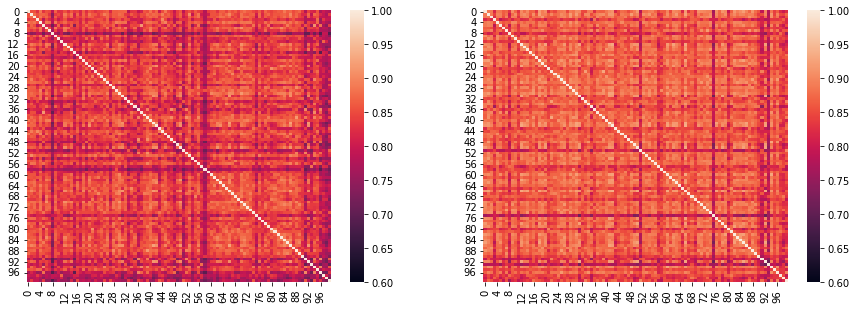

In [51]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.heatmap(gram_cosine(reps1), ax=ax[0], vmin=0.6, vmax=1)
sns.heatmap(gram_cosine(reps2), ax=ax[1], vmin=0.6, vmax=1)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

sns.heatmap(1 - spatial.distance.cdist(reps1, reps2, 'cosine'), vmin=0.6, vmax=1)

In [279]:
reps1 = np.array(datasets['en'][f'cls_1'])[0:100]
reps2 = np.array(datasets['ar'][f'cls_1'])[0:100]

gram1 = gram_cosine(reps1)
gram2 = gram_cosine(reps2)

<AxesSubplot:>

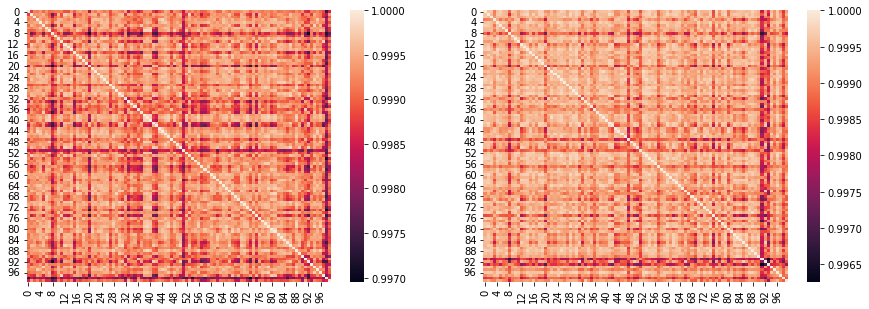

In [189]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.heatmap(gram1, ax=ax[0])
sns.heatmap(gram2, ax=ax[1])

<AxesSubplot:>

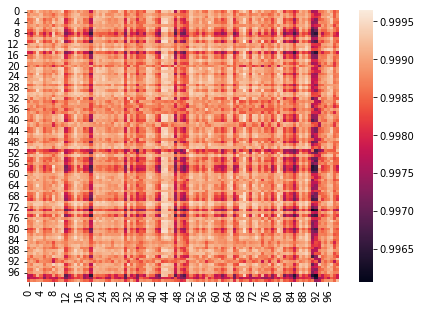

In [190]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

sns.heatmap(1 - spatial.distance.cdist(reps1, reps2, 'cosine'))

In [227]:
reps3 = np.array(datasets['ar'][f'mean_2'])[0:100]

In [252]:
feature_space_linear_cka(reps1, reps2)

dot prod sim 11.747290424737049
normalization_x 4.765928069644155 normalization_y 4.604618917785645 mult 21.945282550289097


0.535299119426571

In [280]:
cka(gram1, gram2)

0.5340296470923027

In [281]:
cka(gram1, gram2, center=False)

0.9999999183287047

In [282]:
gram1_cent = gram_cosine(reps1 - np.mean(reps1, 0, keepdims=True))
gram2_cent = gram_cosine(reps2 - np.mean(reps2, 0, keepdims=True))

In [283]:
cka(gram1_cent, gram2_cent)

0.49176365590388693

In [284]:
cka(gram1_cent, gram2_cent, center=False)

0.49160647688076553

<AxesSubplot:>

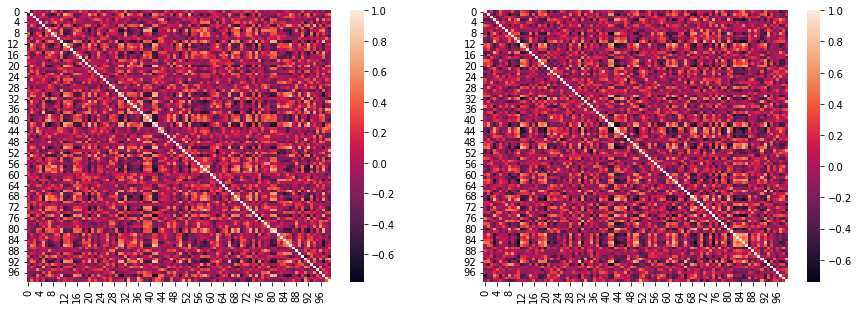

In [285]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.heatmap(gram1_cent, ax=ax[0])
sns.heatmap(gram2_cent, ax=ax[1])

<AxesSubplot:>

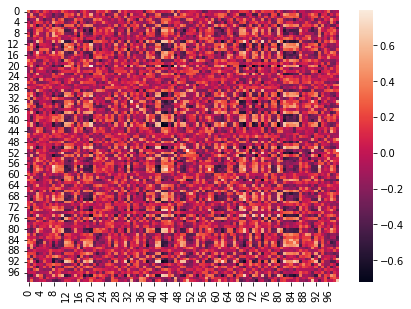

In [302]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

sns.heatmap(1 - spatial.distance.cdist(reps1 - np.mean(reps1, 0, keepdims=True), reps2 - np.mean(reps2, 0, keepdims=True), 'cosine'))

0.18948692615762427 0.0008022716257168938
0.20615243379285836 0.000288942274429478
0.23069350095076618 0.0002561072681263952
0.2845838394899589 0.00015226693856484717
0.3298714538550148 0.00019494134426484516
0.3964444145256926 0.00014607118552928183
0.43817762934471305 5.487422991561844e-05
0.4681998958197931 -1.1685159495925884e-05
0.49348439874120287 -0.0001165779562323652
0.5062861787808809 -0.00029001408137894206
0.49805065788283376 -0.00028915231512854076
0.4809295679039517 -0.0003110594260187254
0.42865724869906113 -0.00030282818262991704


<AxesSubplot:>

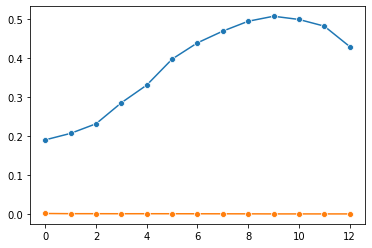

In [304]:
r_pos = []
r_neg = []
for i in range(13):
    reps1 = np.array(datasets['en'][f'mean_{i}'])[0:1000]
    reps2 = np.array(datasets['ar'][f'mean_{i}'])[0:1000]
    reps1 -= np.mean(reps1, 0, keepdims=True)
    reps2 -= np.mean(reps2, 0, keepdims=True)
    #res = np.array([1 - spatial.distance.cosine(a, b) for a,b in zip(reps1,reps2)]).mean()
    #r.append(res)
    
    dm = 1 - spatial.distance.cdist(reps1, reps2, 'cosine')
    pos = dm.diagonal().mean()
    neg = ((dm.sum(axis=1) - dm.diagonal()) / (len(dm) - 1)).mean()
    
    r_pos.append(pos)
    r_neg.append(neg)
    
    print(pos, neg)
    
    
sns.lineplot(data=r_pos, marker='o')
sns.lineplot(data=r_neg, marker='o')

nan nan
0.32393989289334413 0.0007016672537212922
0.29906246466034747 0.000633898885178348
0.2969650476691343 0.0013007701157791126
0.36331426445141296 0.0013372531979385406
0.4004738557934673 0.0005989873040636218
0.4569120481214021 0.0010172185152145178
0.4799681227090556 0.0014801171634546782
0.4850737516320951 0.0012554039346801855
0.48376678325754796 0.0005592976203156342
0.4460000714943434 0.0003749347449802823
0.43451527221502817 -0.00011580790110704679
0.3923980408249994 -0.00011052239331531887


<AxesSubplot:>

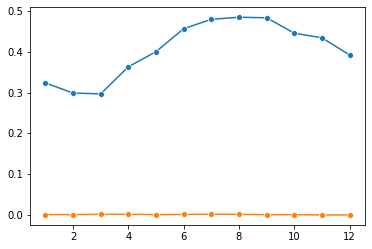

In [305]:
r_pos = []
r_neg = []
for i in range(13):
    reps1 = np.array(datasets['en'][f'cls_{i}'])[0:1000]
    reps2 = np.array(datasets['ar'][f'cls_{i}'])[0:1000]
    reps1 -= np.mean(reps1, 0, keepdims=True)
    reps2 -= np.mean(reps2, 0, keepdims=True)
    #res = np.array([1 - spatial.distance.cosine(a, b) for a,b in zip(reps1,reps2)]).mean()
    #r.append(res)
    
    dm = 1 - spatial.distance.cdist(reps1, reps2, 'cosine')
    pos = dm.diagonal().mean()
    neg = ((dm.sum(axis=1) - dm.diagonal()) / (len(dm) - 1)).mean()
    
    r_pos.append(pos)
    r_neg.append(neg)
    
    print(pos, neg)
    
    
sns.lineplot(data=r_pos, marker='o')
sns.lineplot(data=r_neg, marker='o')

In [308]:
dm[0].min()

-0.2857396309842173

In [232]:
feature_space_linear_cka(reps1, np.random.permutation(reps2.T).T)

dot prod sim 11.747290424737052
normalization_x 4.765928069644155 normalization_y 4.604618917785646 mult 21.945282550289104


0.535299119426571

In [217]:
gram2

array([[1.        , 0.99961542, 0.99965575, ..., 0.99908372, 0.99841265,
        0.99925968],
       [0.99961542, 1.        , 0.99954615, ..., 0.99932072, 0.99854881,
        0.99948193],
       [0.99965575, 0.99954615, 1.        , ..., 0.99927646, 0.99852707,
        0.99910935],
       ...,
       [0.99908372, 0.99932072, 0.99927646, ..., 1.        , 0.99887318,
        0.99896272],
       [0.99841265, 0.99854881, 0.99852707, ..., 0.99887318, 1.        ,
        0.99874629],
       [0.99925968, 0.99948193, 0.99910935, ..., 0.99896272, 0.99874629,
        1.        ]])

## Cosine

### cosine mean 

0.3675840306090815 0.3037799661256851
0.6042048100043619 0.548967515634597
0.781286276282129 0.7432688227602295
0.8168197769878798 0.7734155802323446
0.8428835847220031 0.7967141317308558
0.8489868531650479 0.7862157784731824
0.8744725732003082 0.8085584517688424
0.8978290863823704 0.8345067051608901
0.9171596851470194 0.8588669123885988
0.9152380581738028 0.8525359413669085
0.9155904076999191 0.8587779855503638
0.9122514723457239 0.8597634982770321
0.6888682583129058 0.5372649400169092


<AxesSubplot:>

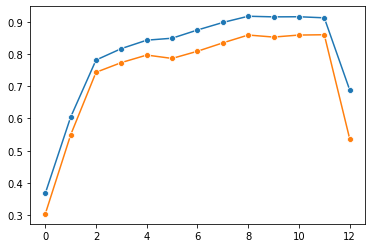

In [126]:
r_pos = []
r_neg = []
for i in range(13):
    reps1 = np.array(datasets['en'][f'mean_{i}'])[0:1000]
    reps2 = np.array(datasets['ar'][f'mean_{i}'])[0:1000]
    #res = np.array([1 - spatial.distance.cosine(a, b) for a,b in zip(reps1,reps2)]).mean()
    #r.append(res)
    
    dm = 1 - spatial.distance.cdist(reps1, reps2, 'cosine')
    pos = dm.diagonal().mean()
    neg = ((dm.sum(axis=1) - dm.diagonal()) / (len(dm) - 1)).mean()
    
    r_pos.append(pos)
    r_neg.append(neg)
    
    print(pos, neg)
    
    
sns.lineplot(data=r_pos, marker='o')
sns.lineplot(data=r_neg, marker='o')

### cka mean

0.49321870857057604 0.9917659929907673
0.466464374035769 0.9971010468534821
0.47749463054702485 0.9990930381748112
0.5458453999438191 0.9993077063962097
0.5895963968997779 0.9994012295355189
0.6290254822410934 0.9993200519660564
0.6506701468400848 0.9994014994820066
0.6599412120264531 0.9995380792978782
0.6661171853544263 0.999644388002264
0.6454125824835972 0.9995512080898734
0.6288940196378618 0.9996181242516339
0.615522707707755 0.9996300514962001
0.6174923633482736 0.9935759566276227


<AxesSubplot:>

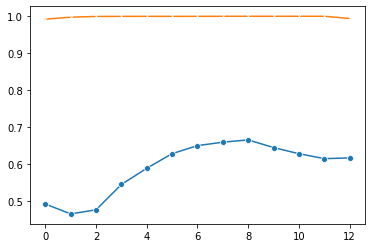

In [131]:
r_cent = []
r_uncent = []
for i in range(13):
    reps1 = np.array(datasets['en'][f'mean_{i}'])[0:1000]
    reps2 = np.array(datasets['ar'][f'mean_{i}'])[0:1000]
    #res = np.array([1 - spatial.distance.cosine(a, b) for a,b in zip(reps1,reps2)]).mean()
    #r.append(res)
    
    cka_cent = cka(gram_cosine(reps1), gram_cosine(reps2))
    cka_uncent = cka(gram_cosine(reps1), gram_cosine(reps2), center=False)
    r_cent.append(cka_cent)
    r_uncent.append(cka_uncent)
    
    print(cka_cent, cka_uncent)
    
    
sns.lineplot(data=r_cent, marker='o')
sns.lineplot(data=r_uncent, marker='x')

### cosine CLS 

1.0 1.0
0.9990140296042582 0.9987349590823332
0.9988772602542287 0.9985472655607631
0.9965985000032622 0.9957870754925346
0.9717794214045705 0.966665592539907
0.9385022393251856 0.9232905793348931
0.9248882372168844 0.894534953440337
0.9155970208219452 0.877075512031578
0.9113030076242015 0.8706351273733486
0.8984568148327269 0.8465810499694718
0.8430330166992588 0.7784506121926349
0.8219716258524129 0.7448812220067519
0.9900056854832346 0.9865211525370967


<AxesSubplot:>

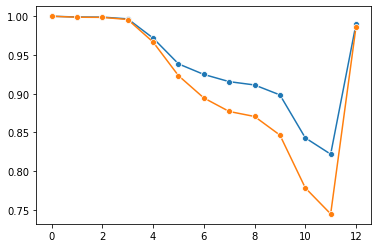

In [127]:
r_pos = []
r_neg = []
for i in range(13):
    reps1 = np.array(datasets['en'][f'cls_{i}'])[0:1000]
    reps2 = np.array(datasets['ar'][f'cls_{i}'])[0:1000]
    #res = np.array([1 - spatial.distance.cosine(a, b) for a,b in zip(reps1,reps2)]).mean()
    #r.append(res)
    
    dm = 1 - spatial.distance.cdist(reps1, reps2, 'cosine')
    pos = dm.diagonal().mean()
    neg = ((dm.sum(axis=1) - dm.diagonal()) / (len(dm) - 1)).mean()
    
    r_pos.append(pos)
    r_neg.append(neg)
    
    print(pos, neg)
    
    
sns.lineplot(data=r_pos, marker='o')
sns.lineplot(data=r_neg, marker='o')

### CKA cls

<ipython-input-13-663b9fa13a53>:95: RuntimeWarning: invalid value encountered in double_scalars
  return scaled_hsic / (normalization_x * normalization_y)


nan 1.0
0.4198619822485604 0.9999999129725666
0.5096190047054014 0.9999999119612735
0.6121898428814491 0.9999995588728818
0.5368565418374407 0.9999815154941581
0.48836400337139335 0.9998883986629648
0.5200049556244498 0.999638730406183
0.5295677234193936 0.999486617295648
0.5361100361427461 0.9994062277781686
0.5477535650526982 0.9991660131515593
0.5239644116371279 0.998068454267442
0.5455674631271987 0.9977813867715617
0.5265292071668543 0.9999921768471336


<AxesSubplot:>

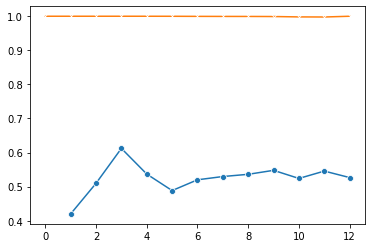

In [130]:
r_cent = []
r_uncent = []
for i in range(13):
    reps1 = np.array(datasets['en'][f'cls_{i}'])[0:1000]
    reps2 = np.array(datasets['ar'][f'cls_{i}'])[0:1000]
    #res = np.array([1 - spatial.distance.cosine(a, b) for a,b in zip(reps1,reps2)]).mean()
    #r.append(res)
    
    cka_cent = cka(gram_cosine(reps1), gram_cosine(reps2))
    cka_uncent = cka(gram_cosine(reps1), gram_cosine(reps2), center=False)
    r_cent.append(cka_cent)
    r_uncent.append(cka_uncent)
    
    print(cka_cent, cka_uncent)
    
    
sns.lineplot(data=r_cent, marker='o')
sns.lineplot(data=r_uncent, marker='x')

0.5372649400169092

In [75]:
(1 - spatial.distance.cdist(reps1, reps2, 'cosine'))[4][0]

0.5487497480887715

In [ ]:
r = []
for i in range(13):
    reps1 = np.array(datasets['en'][f'mean_{i}'])[0:1000]
    reps2 = np.array(datasets['ar'][f'mean_{i}'])[0:1000]
    a = np.array([1 - spatial.distance.cosine(a, b) for a,b in zip(reps1,reps2)]).mean()
    print(a)
    r.append(a)
    
sns.lineplot(data=r, marker='o')

In [ ]:
r

In [56]:
1 - spatial.distance.cdist(reps1, reps2, 'cosine').diagonal().mean()

0.8134277606272113

In [47]:
1 - spatial.distance.cdist(reps1, reps2, 'cosine')

array([[0.79264776, 0.77514349, 0.77270782, ..., 0.78447483, 0.80511091,
        0.75124141],
       [0.77291616, 0.80059565, 0.76893673, ..., 0.8091991 , 0.78424058,
        0.76329973],
       [0.77903797, 0.79336326, 0.81496744, ..., 0.79598333, 0.79333672,
        0.76800743],
       ...,
       [0.68675823, 0.70097302, 0.70973476, ..., 0.81219878, 0.79036005,
        0.71405011],
       [0.67997689, 0.71120013, 0.70999126, ..., 0.7941541 , 0.80917233,
        0.70467974],
       [0.68475766, 0.70823718, 0.6886657 , ..., 0.71561708, 0.73276566,
        0.74759585]])

In [48]:
gram_cosine(reps1)

array([[1.        , 0.85217352, 0.85566644, ..., 0.79865747, 0.78190857,
        0.77422095],
       [0.85217352, 1.        , 0.87545148, ..., 0.79510617, 0.76904177,
        0.83556229],
       [0.85566644, 0.87545148, 1.        , ..., 0.79013845, 0.78381622,
        0.79193356],
       ...,
       [0.79865747, 0.79510617, 0.79013845, ..., 1.        , 0.80665737,
        0.75005977],
       [0.78190857, 0.76904177, 0.78381622, ..., 0.80665737, 1.        ,
        0.72202972],
       [0.77422095, 0.83556229, 0.79193356, ..., 0.75005977, 0.72202972,
        1.        ]])

In [49]:
gram_cosine(reps2)

array([[1.        , 0.88873553, 0.89046228, ..., 0.82021666, 0.79958135,
        0.82248579],
       [0.88873553, 1.        , 0.88863753, ..., 0.84938436, 0.84316771,
        0.87397097],
       [0.89046228, 0.88863753, 1.        , ..., 0.81953915, 0.80876968,
        0.85539818],
       ...,
       [0.82021666, 0.84938436, 0.81953915, ..., 1.        , 0.84884073,
        0.7936828 ],
       [0.79958135, 0.84316771, 0.80876968, ..., 0.84884073, 1.        ,
        0.82154236],
       [0.82248579, 0.87397097, 0.85539818, ..., 0.7936828 , 0.82154236,
        1.        ]])

In [172]:
1 - spatial.distance.cosine(reps1[0], reps2[0])

0.7067844810390997

1
dot prod sim 1196240231145.7288
normalization_x 1034528.7807594462 normalization_y 1163566.232812949 mult 1203742756164.842
2
dot prod sim 2897046854713.242
normalization_x 1731326.8908261706 normalization_y 1677888.4205492293 mult 2904973342302.731
3
dot prod sim 5018209003215.579
normalization_x 2234718.887790579 normalization_y 2250589.86230412 mult 5029435673961.015
4
dot prod sim 5319125420309.966
normalization_x 2253825.6958310287 normalization_y 2364533.0559043526 mult 5329245360039.097
5
dot prod sim 5263070563673.931
normalization_x 2216713.0496798507 normalization_y 2379263.5073275412 mult 5274144465320.012
6
dot prod sim 7781174947989.644
normalization_x 2676343.9965097383 normalization_y 2915519.479131166 mult 7802933054679.895
7
dot prod sim 11145674767300.79
normalization_x 3183725.7945454386 normalization_y 3513075.51450631 mult 11184669133719.729
8
dot prod sim 18096525894360.316
normalization_x 4070229.1041956344 normalization_y 4460153.43355725 mult 18153846314442.8

(0.0, 1.0)

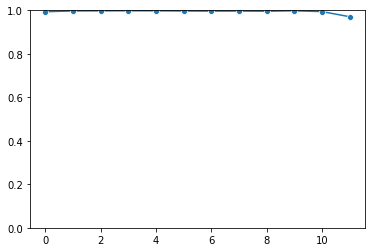

In [17]:
%%time

r = []
for j in range(num_layers):
    if j == 0:
        continue
    print(j)
    reps2 = np.array(datasets['ar'][f'mean_{j}'])
    np.random.shuffle(reps2)
    
    r.append(feature_space_linear_cka(np.array(datasets['en'][f'mean_{j}']), reps2, avg=False))
    
sns.lineplot(data=r, marker='o')
plt.ylim(0,1)

1
dot prod sim 6490202319904.0205
normalization_x 2545687.906345096 normalization_y 2549494.3519493854 mult 6490216939052.678
2
dot prod sim 12594946127928.613
normalization_x 3549458.866459616 normalization_y 3548415.5612082332 mult 12594955075613.838
3
dot prod sim 25516349245516.85
normalization_x 5057530.9127498 normalization_y 5045231.360043691 mult 25516413565395.68
4
dot prod sim 26651506541017.62
normalization_x 5208072.749961281 normalization_y 5117850.904827708 mult 26654139835797.875
5
dot prod sim 18468293573290.47
normalization_x 4413102.32682671 normalization_y 4186949.5308968397 mult 18477436717106.848
6
dot prod sim 19993438231333.56
normalization_x 4582380.70806084 normalization_y 4369577.172151164 mult 20023066136048.535
7
dot prod sim 20885700336569.434
normalization_x 4724817.070983354 normalization_y 4434822.941710202 mult 20953727141780.977
8
dot prod sim 30384819469496.938
normalization_x 5632532.409783156 normalization_y 5412768.2546356525 mult 30487592620880.72

(0.0, 1.0)

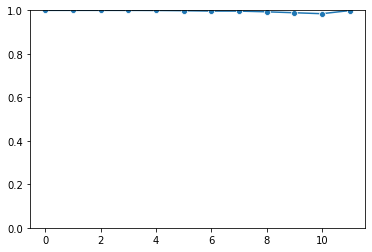

In [16]:
%%time

r = []
for j in range(num_layers):
    if j == 0:
        continue
    print(j)
    reps2 = np.array(datasets['ar'][f'cls_{j}'])
    np.random.shuffle(reps2)
    
    r.append(feature_space_linear_cka(np.array(datasets['en'][f'cls_{j}']), reps2, avg=False))
    
sns.lineplot(data=r, marker='o')
plt.ylim(0,1)

1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 4min 5s, sys: 5.85 s, total: 4min 10s
Wall time: 3min 17s


(0.0, 1.0)

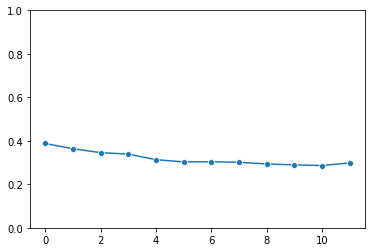

In [11]:
%%time

r = []
for j in range(num_layers):
    if j == 0:
        continue
    print(j)
    reps2 = np.array(datasets['ar'][f'cls_{j}'])
    np.random.shuffle(reps2)
    
    r.append(analysis.pwcca(np.array(datasets['en'][f'cls_{j}']).T, reps2.T))
    
sns.lineplot(data=r, marker='o')
plt.ylim(0,1)

(0.0, 1.0)

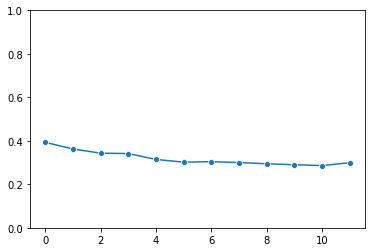

In [30]:
sns.lineplot(data=r, marker='o')
plt.ylim(0,1)

1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 2min 40s, sys: 5.92 s, total: 2min 46s
Wall time: 2min 33s


(0.0, 1.0)

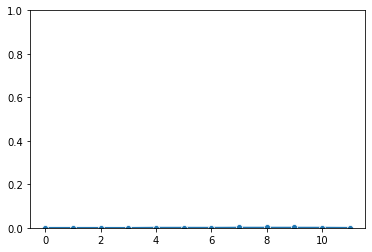

In [31]:
%%time

r = []
for j in range(num_layers):
    if j == 0:
        continue
    print(j)
    reps2 = np.array(datasets['ar'][f'cls_{j}'])
    np.random.shuffle(reps2)
    
    r.append(analysis.cka(np.array(datasets['en'][f'cls_{j}']).T, reps2.T))
    
sns.lineplot(data=r, marker='o')
plt.ylim(0,1)

In [84]:
r

[0.7791133232503115,
 0.8054282397709936,
 0.7848413078447403,
 0.7448861737851123,
 0.6480538800193152,
 0.6216873592128386,
 0.6068844606036023,
 0.5991472209706395,
 0.5944843905671022,
 0.5837459890693324,
 0.5895009034175067,
 0.6428495871649859]

In [ ]:
sns.lineplot(data=r, marker='o')
plt.ylim(0,1)

(0.0, 1.0)

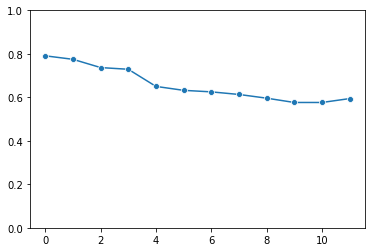

In [21]:
sns.lineplot(data=r, marker='o')
plt.ylim(0,1)

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
y

NameError: name 'y' is not defined

In [32]:
r # hyp

[0.6172094030606003,
 0.5854819510759801,
 0.6346019191827651,
 0.6631288710254764,
 0.7115577528346078,
 0.7418006302345395,
 0.7484686200765538,
 0.7119077178866541,
 0.7072865407820622,
 0.6774094473375084,
 0.6409690230967565,
 0.5699941907184463,
 0.5595081711785631]

In [22]:
%%time

cls_cka = defaultdict(list)
mean_cka = defaultdict(list)

for l in langs:
    if l == 'en':
        continue
    print(l)
    for j in range(num_layers):
        cls_cka[l].append(analysis.cka(np.array(datasets['en'][f'cls_{j}']).T, np.array(datasets[l][f'cls_{j}']).T))
        mean_cka[l].append(analysis.cka(np.array(datasets['en'][f'mean_{j}']).T, np.array(datasets[l][f'mean_{j}']).T))

ar


/gpfs/space/home/maksym95/.conda/envs/paper3/lib/python3.8/site-packages/ecco/svcca_lib/cka_lib.py:162: RuntimeWarning: invalid value encountered in double_scalars
  return dot_product_similarity / (normalization_x * normalization_y)


az


KeyboardInterrupt: 

In [11]:
num_layers = 13

def sts_spearman(reps1, reps2):
    res = []
    for s, t in zip(reps1, reps2):
        res.append(1 - spatial.distance.cosine(s, t))
    return stats.spearmanr(res, en_pivot['similarity_score']).correlation

In [11]:
from collections import defaultdict

In [12]:
%%time

cls_spearman = defaultdict(list)
mean_spearman = defaultdict(list)

for l in langs:
    print(l)
    for j in range(num_layers):
        cls_spearman[l].append(sts_spearman(en_pivot[f'cls_{j}'], datasets[l][f'cls_{j}']))
        mean_spearman[l].append(sts_spearman(en_pivot[f'mean_{j}'], datasets[l][f'mean_{j}']))

en


/gpfs/space/home/maksym95/.conda/envs/paper3/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


de
es
fr
it
nl
pl
pt
ru
zh
CPU times: user 4min 36s, sys: 5.71 s, total: 4min 42s
Wall time: 4min 43s


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 0.8)

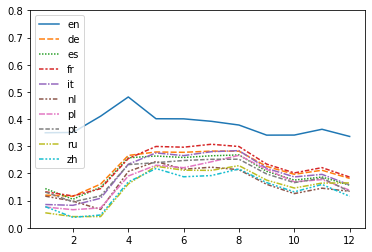

In [23]:
sns.lineplot(data=pd.DataFrame(cls_spearman))
plt.ylim(0, 0.8)

(0.0, 0.8)

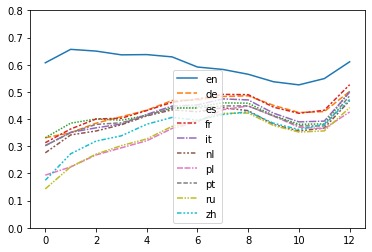

In [24]:
sns.lineplot(data=pd.DataFrame(mean_spearman))
plt.ylim(0, 0.8)

In [19]:
df_mean_spearman = pd.DataFrame(mean_spearman)
df_cls_spearman = pd.DataFrame(cls_spearman)

In [20]:
df_cls_spearman["cl avg"] = df_cls_spearman.loc[:, df_cls_spearman.columns != 'en'].mean(axis=1)
df_mean_spearman["cl avg"] = df_mean_spearman.loc[:, df_mean_spearman.columns != 'en'].mean(axis=1)

In [21]:
xling = {"xling_cls": df_cls_spearman["cl avg"], "xling_mean": df_mean_spearman["cl avg"]}
en = {"en_cls": df_cls_spearman["en"], "en_mean": df_mean_spearman["en"]}

In [27]:
list(range(13))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

<AxesSubplot:>

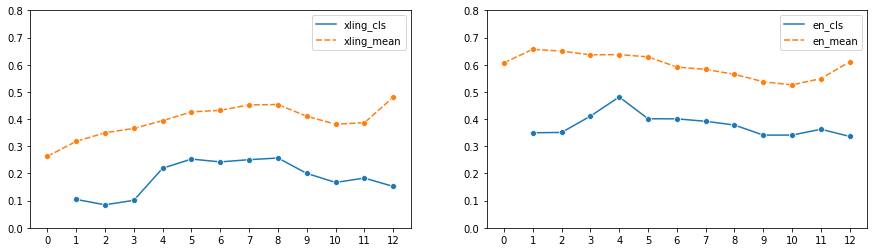

In [31]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].set_ylim([0,0.8])
ax[0].set(xticks=list(range(13)))

ax[1].set_ylim([0,0.8])
ax[1].set(xticks=list(range(13)))

sns.lineplot(data=pd.DataFrame(xling), ax=ax[0], marker='o')
sns.lineplot(data=pd.DataFrame(en), ax=ax[1], marker='o')
